In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder   
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("C:/Users/shrey/OneDrive/Documents/bank.csv",sep=';')
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
df.isnull().sum()
df.drop_duplicates()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [5]:
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
       df[col] = le.fit_transform(df[col])

In [6]:
df.columns = df.columns.str.strip().str.lower()
X = df.drop('y', axis=1)
y = df['y']

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [20]:
clf = DecisionTreeClassifier(criterion='entropy',max_depth=3)
clf.fit(X_train,y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [21]:
y_pred = clf.predict(X_test)

In [22]:
accuracy_score(y_test,y_pred)
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.91      0.97      0.94       807\n           1       0.41      0.17      0.24        98\n\n    accuracy                           0.88       905\n   macro avg       0.66      0.57      0.59       905\nweighted avg       0.85      0.88      0.86       905\n'

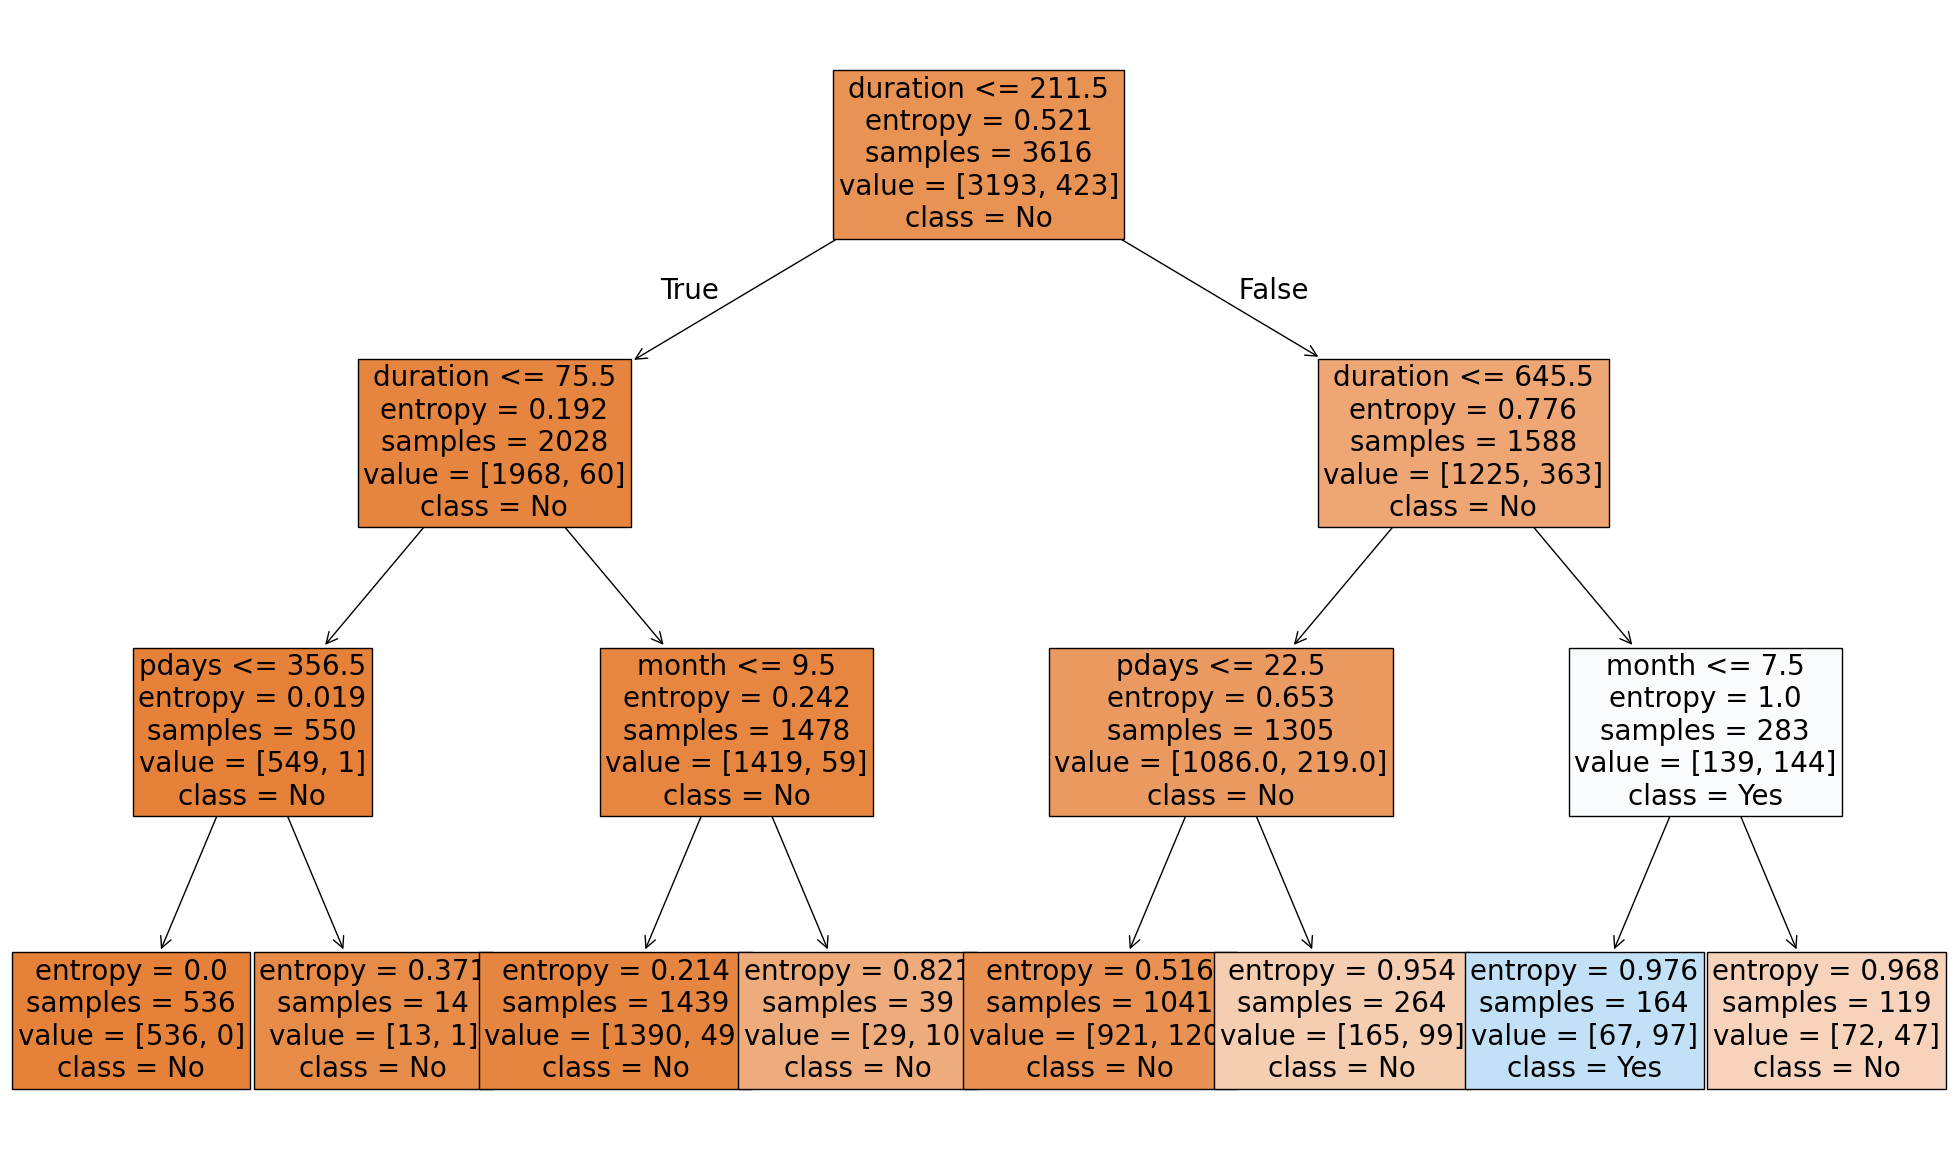

In [29]:
plt.figure(figsize=(25,15))
plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True,fontsize=20)
plt.show()